# **SVMs**

# **Máquinas de vectores de soporte**

Algoritmo de M.L. para aprendisaje supervisado (del inglés support-vector machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado.

*El aprendizaje supervisado es una técnica para deducir una función a partir de datos de formación. Los datos de formación consisten de pares de objetos (normalmente vectores): una componente del par son los datos de entrada y el otro, los resultados deseados. La salida de la función puede ser un valor numérico (como en los problemas de regresión) o una etiqueta de clase (como en los de clasificación). El objetivo del aprendizaje supervisado es el de crear una función capaz de predecir el valor correspondiente a cualquier objeto de entrada válida después de haber visto una serie de ejemplos, los datos de formación. Para ello, tiene que generalizar a partir de los datos presentados a las situaciones no vistas previamente.*


Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de formación (de muestras) podemos etiquetar las clases y formar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase.

Más formalmente, una SVM construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad muy alta (o incluso infinita) que puede ser utilizado en problemas de clasificación o regresión. Una buena separación entre las clases permitirá una clasificación correcta.

Fuente: [Wikipedia](https://es.wikipedia.org/wiki/M%C3%A1quina_de_vectores_de_soporte)


---


SVM busca encongtrar una linea, plano o hiperplano que separe los datos de la mejor forma, a diferencia de la regresion lineal que busca encontrar una line que se adapte mejor a los datos.

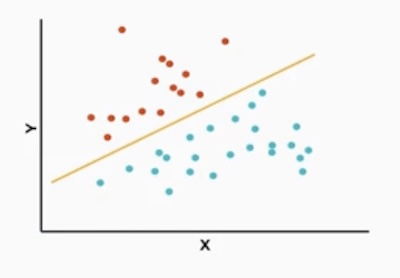

Si tiene varias opcione de lineas el modelo buscara la que separe lo mejor posible los grupos de datos maximizando la distancia o el margen que existe entre los puntos o vectores mas cercanos a la linea. Estos son los llamados vectores de soporte.

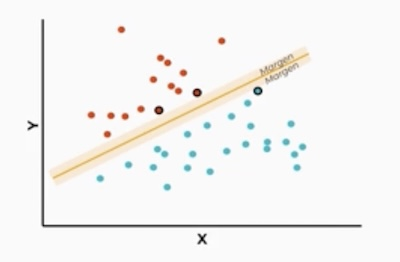

Los SVMs soporta datos atipicos en las muestras encontrando la linea que mejor los separe. Para ello cuenta con parametros ajustables para entre otras cosas decirle que tan propenzo sea a ignorar los datos atipicos.

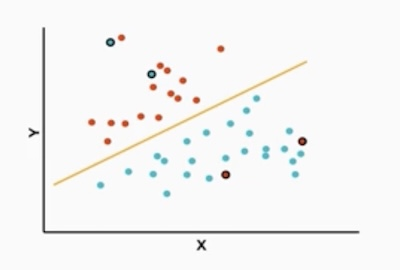


# Funciones Kernel:

La manera más simple de realizar la separación es mediante una línea recta, un plano recto o un hiperplano N-dimensional.

Desafortunadamente los universos a estudiar no se suelen presentar en casos idílicos de dos dimensiones como en el ejemplo anterior, sino que un algoritmo SVM debe tratar con a) más de dos variables predictoras, b) curvas no lineales de separación, c) casos donde los conjuntos de datos no pueden ser completamente separados, d) clasificaciones en más de dos categorías.

Debido a las limitaciones computacionales de las máquinas de aprendizaje lineal, éstas no pueden ser utilizadas en la mayoría de las aplicaciones del mundo real. La representación por medio de funciones Kernel ofrece una solución a este problema, proyectando la información a un espacio de características de mayor dimensión el cual aumenta la capacidad computacional de la máquinas de aprendizaje lineal. Es decir, mapearemos el espacio de entradas X a un nuevo espacio de características de mayor dimensionalidad (Hilbert).

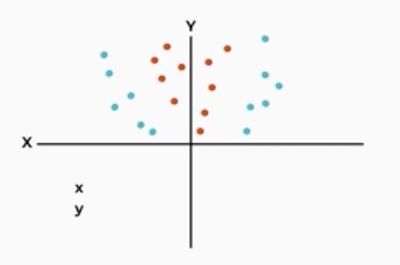

En este caso no podemos obtener una linea que separe en dos categorias los datos. Pero si agregamos una nueva caracteristica, no inventando datos nuevos, sino procesando los que ya tenemos, realizando una transformacion poir ejemplo el modulo de X (Valor absoluto). Ahora si podemos encontrar una linea para separ en grupos definidos.

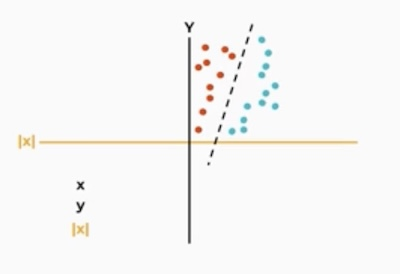

Sucede lo mismo con este otro ejemplo. No hay una linea que pueda separlos:

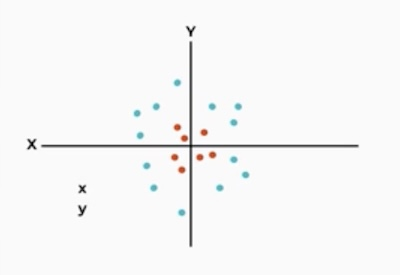

Pero si agregamos una nueva dimension por ejemplo Z y otra caracteristica que sea X^2 + Y^2, esto utilizando los datos que ya teniamos, y lo graficamos respecto a Z, otendremos lo siguiente:

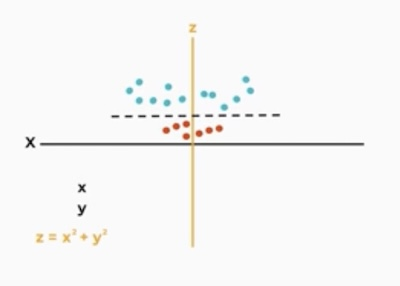

Ahora si podemos separar en grupos con una linea. Lo interesante es que no tenemos que nosotros escribir estas caracteristicas sino que los SVMs se encargan de tomar espacios dimensionales pequeños y lo transforman a un espacio dimensional mas amplico. Alli realizan los calculos para solucionar problemas que no eran posibles en dimensiones menores y regresan el resultado para utilizarlo con las caracteristicas originales.

Estas funciones son llamadas Kernels. Existen varias y se pueden utilizar de acuerdo al caso.

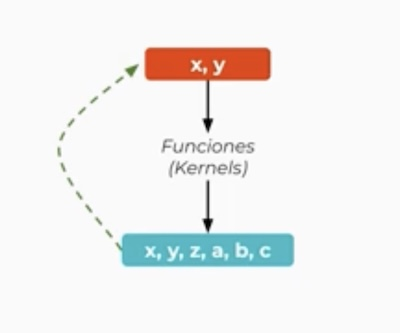


# Parametros ajustables

Los SVMs cuentan con parametros ajustables. Entre ellos el Kernel a utilizar que vimos anteriormente, el dato C que controla que tan ajustada deber ser la linea:

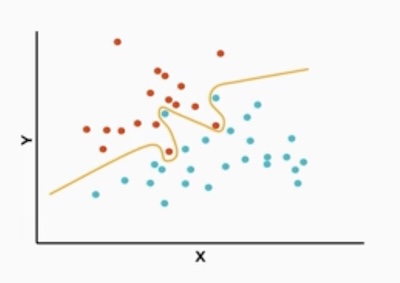

Y el dato Gamma que dice si debe considerar solo los puntos cercanos o mas lejanos para sus calculos.

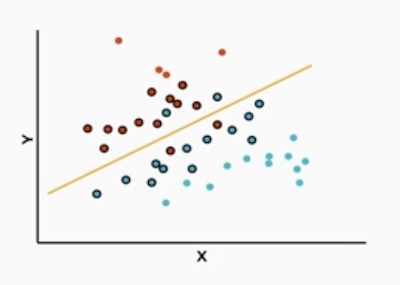

Estos ajustes se modifican para lograr un buen ajuste de  los resultados pero tratando de que no tengamos un sobre ajuste a los datos y despues le sea dificl generalizar al modelo.
Todo esto lo hemos visto y graficado en dos dimensiones pero funciona en multiples dimensiones para los calculos.

Desventajas: Si el set de datos es muy grnade este algoritmo toma mucho tiempo en procesar.

In [1]:
#En este ejemplo los datos los vamos a tomar directamente de la libreria SKLearn.

from sklearn import datasets

datos = datasets.load_breast_cancer(as_frame=True)

In [ ]:
datos.frame.head()

In [ ]:
datos.frame.info()

In [ ]:
datos.frame.isna().sum()

In [ ]:
datos.frame.describe()

In [ ]:
datos.data.shape

In [7]:
from sklearn.model_selection import train_test_split

X = datos.data
y = datos.target

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size = .5)

In [ ]:
from sklearn import svm
from sklearn import metrics

kernels = ["linear", "rbf", "sigmoid"]
gammas = [1, .01, .001, .0001, .00001]

for kernel in kernels:
  for gamma in gammas:
    modelo = svm.SVC(kernel=kernel, gamma=gamma)
    modelo.fit(X_ent, y_ent)
    predicciones = modelo.predict(X_pru)
    print(f"{kernel}: Gamma: {gamma}: Exactitud:", metrics.accuracy_score(y_pru, predicciones))
    print(f"{kernel}: Gamma: {gamma}: Precisión:", metrics.precision_score(y_pru, predicciones))

In [ ]:
modelo = svm.SVC(kernel="linear")
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
print(f"{kernel}: Gamma: {gamma}: Exactitud:", metrics.accuracy_score(y_pru, predicciones))
print(f"{kernel}: Gamma: {gamma}: Precisión:", metrics.precision_score(y_pru, predicciones))

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pd.DataFrame( confusion_matrix(y_pru, predicciones))